In [1]:
from rdkit import Chem
import numpy as np
np.random.seed(123)  # for reproducibility
import matplotlib.pyplot as plt
import matplotlib
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
import tensorflow as tf

In [2]:
SMILES_CHAR = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'y',
               'A', 'B', 'C', 'D', 'E', 'G', 'F', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 
               'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
               '#', '%', '(', ')', '[', ']', '-', '+', '=', '.', '/', '\\', '@']

char_to_ind = {c : i for i, c in enumerate(SMILES_CHAR)}

In [3]:
def smiles_to_array(smiles: str, max_len: int) -> np.array:
    mol_array = np.zeros((max_len, len(SMILES_CHAR) + 1))
    for i, c in enumerate(smiles):
        mol_array[i][char_to_ind[c]] = 1
    for i in range(len(smiles), max_len):
        mol_array[i][len(SMILES_CHAR)] = 1
    return mol_array

def array_to_smiles(mol_array: np.array) -> str:
    smiles = ''
    for l in mol_array:
        j = np.argmax(l)
        if l[j] == 0 or j == len(SMILES_CHAR):
            break
        smiles += SMILES_CHAR[j]
    return smiles

SMILES_CHAR size = 66
(11433, 128, 128, 1)
(11433, 44, 67)
(128, 128, 1)


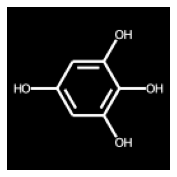

In [4]:
import os
import rapidjson
import cv2
from sklearn.model_selection import train_test_split

def create_filename(num: int) -> str:
    return str(num) + '.png'

FOLDER_NAME = 'images'
OUTPUT_FILENAME = 'num_of_images.json'

with open(OUTPUT_FILENAME, 'r') as json_file:
    data = rapidjson.load(json_file)

max_len = max([len(datum['deepsmiles']) for datum in data])
pictures = []
smileses = []
for datum in data:
    img = cv2.imread(
        os.path.join(FOLDER_NAME, create_filename(datum['image_num'])),
        cv2.IMREAD_GRAYSCALE
    )
    img = img.astype('float32')
    img /= 255
    pictures.append(img)
    smileses.append(smiles_to_array(datum['deepsmiles'], max_len))
pictures = np.expand_dims(np.array(pictures), axis=3)
smileses = np.array(smileses)
print(f'SMILES_CHAR size = {len(SMILES_CHAR)}')
print(pictures.shape)
print(smileses.shape)
print(pictures[3].shape)
plt.figure(figsize=np.array(pictures[0].shape[:-1]) / 50)
plt.imshow(pictures[2], cmap='Greys')
plt.axis('off')
plt.tight_layout()
plt.show()
p_train, p_test, s_train, s_test = train_test_split(pictures, smileses, test_size=0.2)

In [6]:
model = Sequential()

model.add(Flatten(input_shape=(128,128,1)))
model.add(Dense(16384, activation='relu'))
model.add(Dense(8192, activation='relu'))
model.add(Dense(44 * 67, activation='relu'))
model.add(Reshape((44, 67)))
model.add(Dense(67, activation=tf.keras.activations.softmax))

model.summary()

opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_4 (Dense)             (None, 16384)             268451840 
                                                                 
 dense_5 (Dense)             (None, 8192)              134225920 
                                                                 
 dense_6 (Dense)             (None, 2948)              24152964  
                                                                 
 reshape_1 (Reshape)         (None, 44, 67)            0         
                                                                 
 dense_7 (Dense)             (None, 44, 67)            4556      
                                                                 
Total params: 426,835,280
Trainable params: 426,835,28

In [7]:
model.fit(p_train, s_train, 
          batch_size=32, epochs=20)

Epoch 1/20
286/286 [==============================] - 406s 1s/step - loss: 1.3500 - accuracy: 0.6626
Epoch 2/20
286/286 [==============================] - 407s 1s/step - loss: 1.2039 - accuracy: 0.6710
Epoch 3/20
286/286 [==============================] - 400s 1s/step - loss: 1.1710 - accuracy: 0.6728
Epoch 4/20
286/286 [==============================] - 408s 1s/step - loss: 1.1525 - accuracy: 0.6743
Epoch 5/20
286/286 [==============================] - 407s 1s/step - loss: 1.1368 - accuracy: 0.6769
Epoch 6/20
286/286 [==============================] - 397s 1s/step - loss: 1.1253 - accuracy: 0.6789
Epoch 7/20
286/286 [==============================] - 406s 1s/step - loss: 1.1026 - accuracy: 0.6848
Epoch 8/20
286/286 [==============================] - 424s 1s/step - loss: 1.0900 - accuracy: 0.6874
Epoch 9/20
286/286 [==============================] - 412s 1s/step - loss: 1.0827 - accuracy: 0.6886
Epoch 10/20
286/286 [==============================] - 396s 1s/step - loss: 1.0789 - accura

In [8]:
model.evaluate(p_test, s_test)

72/72 [==============================] - 14s 124ms/step - loss: 1.0346 - accuracy: 0.7028


[1.03463613986969, 0.7028362154960632]

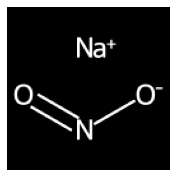

CCCCCCCCCCCC)))
N=O)[O-].[Na+]


In [30]:
ind = 4
plt.figure(figsize=np.array(p_test[ind].shape[:-1]) / 50)
plt.imshow(p_test[ind], cmap='Greys')
plt.axis('off')
plt.tight_layout()
plt.show()
smiles_array = model.predict(np.array([p_test[ind]]))
print(array_to_smiles(smiles_array[0]))
ans = np.array(s_test[ind])
print(array_to_smiles(ans))

In [ ]:
kek_model = Model(inputs=model.input, outputs=model.layers[3].output)
kek_model.summary()

In [ ]:
p_size = 32
output_layout = kek_model.predict(np.array([p_test[ind]]))
print(output_layout[0, :, :, 0].reshape(p_size, p_size, -1).shape)
plt.imshow(output_layout[0, :, :, 1].reshape(p_size, p_size, -1), cmap='Greys')
plt.show()

In [ ]:
output_layout = kek_model.predict(np.array([p_test[ind]]))
all_layout_p = np.zeros((2 * p_size, 2 * p_size))
for i in range(2):
    for j in range(2):
        all_layout_p[i * p_size : (i + 1) * p_size, 
                     j * p_size : (j + 1) * p_size] = output_layout[0, :, :, 2 * i + j]
all_layout_p.reshape(2 * p_size, 2 * p_size, -1)
plt.imshow(all_layout_p, cmap='Greys')
plt.show()

In [ ]:
mem = Sequential()
